In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
print(np, tf)
tf.keras.backend.set_floatx('float64')

<module 'numpy' from '/home/rajarshi/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/__init__.py'> <module 'tensorflow' from '/home/rajarshi/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/__init__.py'>


In [4]:
npoints = 100000
ndim = 2
x_sqr = 2 * np.random.random((npoints, ndim)) - 1

In [5]:
x_circ = x_sqr[(x_sqr**2).sum(axis=1) <= 1].copy()
x_sqr = x_sqr[(x_sqr**2).sum(axis=1) > 1].copy()

In [15]:
my_activation = tf.keras.activations.sigmoid
inputs = tf.keras.Input(ndim)
# here onwards are all hidden layers.
Dense = tf.keras.layers.Dense(ndim, activation=my_activation)(inputs)
for _ in range(3):
    Dense = tf.keras.layers.Dense(ndim, activation=my_activation)(Dense)
#
# till here.
outputs = tf.keras.layers.Dense(ndim, activation=tf.keras.activations.linear)(Dense)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile()

In [16]:
weights  = model.get_weights()

In [17]:
print(weights)

[array([[ 0.3806556 ,  0.61678293],
       [ 0.03875004, -1.06162487]]), array([0., 0.]), array([[ 0.2961728 , -1.0560858 ],
       [-0.61987637, -0.22265456]]), array([0., 0.]), array([[-0.27572829,  1.20457815],
       [-0.84049415, -0.62269299]]), array([0., 0.]), array([[-0.25921868,  1.18988117],
       [-0.38091126, -1.05353829]]), array([0., 0.]), array([[ 0.48581672,  1.18872558],
       [-0.29794952, -1.21745113]]), array([0., 0.])]


In [18]:
new_w = []
for w in weights:
    #w = w.clip(0.3, 2.0)
    w = np.random.normal(loc=0, scale=3, size=w.shape) #np.ones(w.shape)
    new_w.append(w)
#
print(new_w)
model.set_weights(new_w)

[array([[-3.79538478, -1.60643942],
       [ 2.10964631, -2.58347464]]), array([ 1.92628622, -0.15883311]), array([[-3.35605773,  5.3727324 ],
       [-2.58780907,  0.0578238 ]]), array([3.24758057, 1.73688023]), array([[ 1.17199575,  5.39765182],
       [ 1.75345309, -0.47034984]]), array([ 1.73075253, -2.58394142]), array([[-2.45236135,  5.89992784],
       [ 0.23568834,  0.87133238]]), array([-0.48098175, -2.35705785]), array([[ 7.36632254, -4.53314219],
       [ 4.40976531,  6.80395066]]), array([-0.9455778 , -2.88135301])]


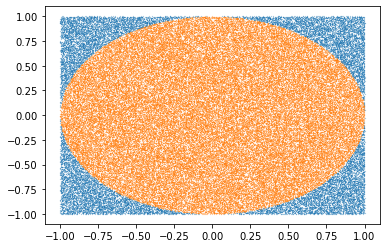

In [19]:
plt.plot(x_sqr[:, 0], x_sqr[:, 1], '.', ms=0.3)
plt.plot(x_circ[:, 0], x_circ[:, 1], '.', ms=0.3)
plt.show()

In [20]:
y_sqr = model.predict(x_sqr)
y_circ = model.predict(x_circ)
#plt.plot(y_sqr[:, 0], y_sqr[:, 1], '.', ms=0.3)
#plt.plot(y_circ[:, 0], y_circ[:, 1], '.', ms=0.3)
#plt.show()

2022-08-23 10:38:36.737701: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-23 10:38:36.758062: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2688000000 Hz


In [21]:
np.savetxt('in1.dat', x_sqr)
np.savetxt('in2.dat', x_circ)
np.savetxt('out1.dat', y_sqr)
np.savetxt('out2.dat', y_circ)

In [22]:
x0, x1 = x_circ.copy(), x_sqr.copy()

In [23]:
#il = 0
#np.savetxt('c' + str(il) + '.dat', x0)
#np.savetxt('s' + str(il) + '.dat', x1)

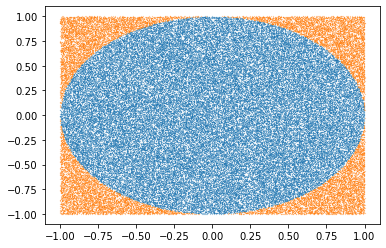

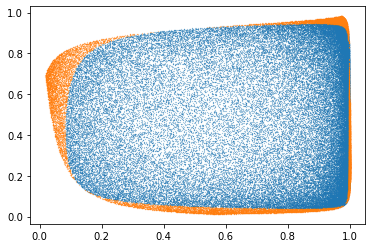

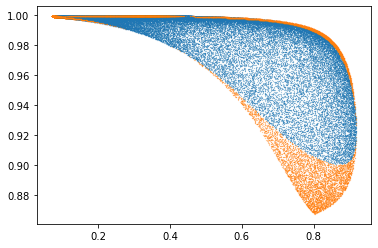

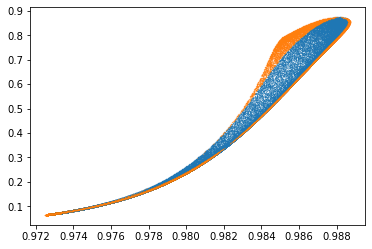

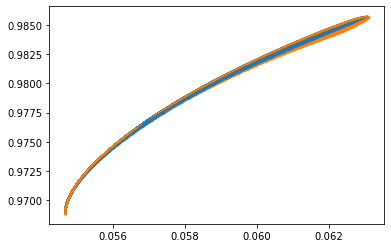

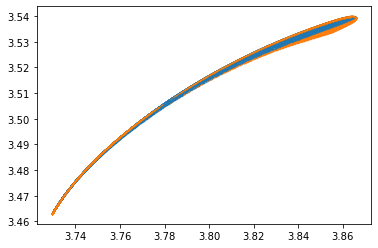

In [24]:
for il, layer in enumerate(model.layers, start=1):
    x0 = layer(x0)
    x1 = layer(x1)
    #np.savetxt('c' + str(il) + '.dat', x0)
    #np.savetxt('s' + str(il) + '.dat', x1)
    plt.plot(x0[:, 0], x0[:, 1], '.', ms=0.3)
    plt.plot(x1[:, 0], x1[:, 1], '.', ms=0.3)
    plt.show()
#

In [25]:
x_sqr.shape

(21476, 2)

In [28]:
model.predict(x_sqr[:100]).shape

(100, 2)

In [29]:
model.fit()

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>